In [ ]:
#imports

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers, optimizers
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [ ]:
# here I load all the data from the csv files
x_train = pd.read_csv("/content/imdb_train.csv").values

y_train = pd.read_csv("/content/imdb_y_train.csv").values

x_test = pd.read_csv("/content/imdb_test.csv").values

y_test = pd.read_csv("/content/imdb_y_test.csv").values



In [ ]:
#List all the hyperparameters
hidden_layers = [[(1,)], [(16, 4)], [(32, 16, 8, 4)]]

learning_rates = [0.1, 0.001, 0.00001]

words_option = [10000, 1000]

epochs = 20

batch_size = 512

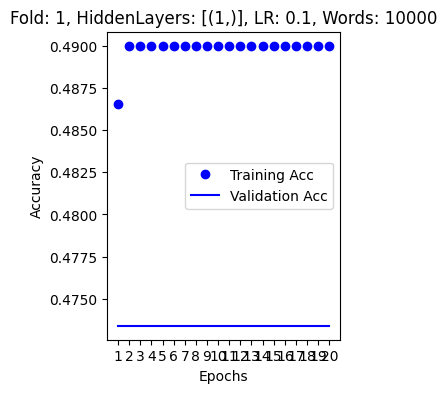

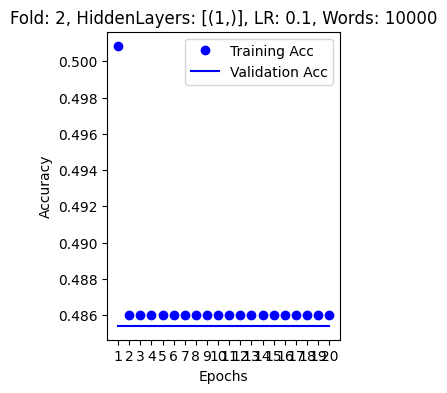

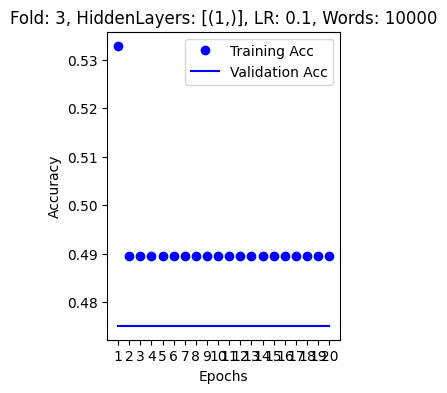

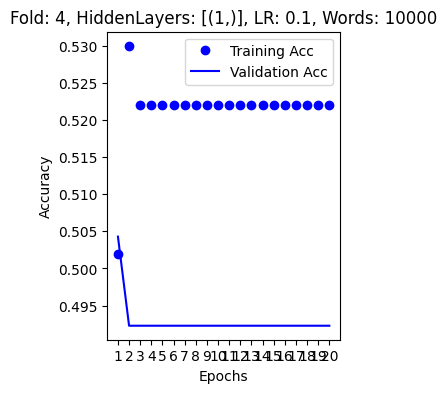

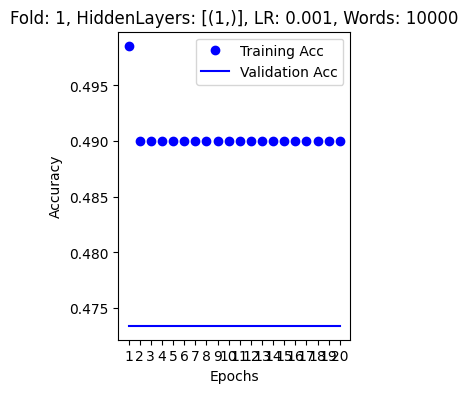

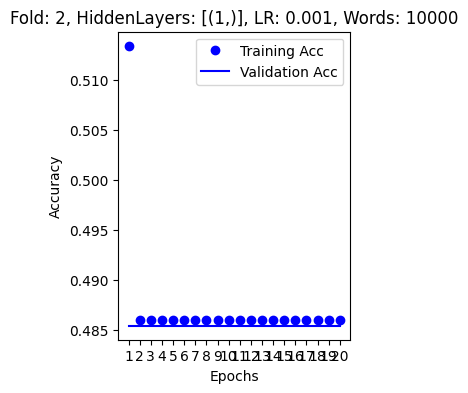

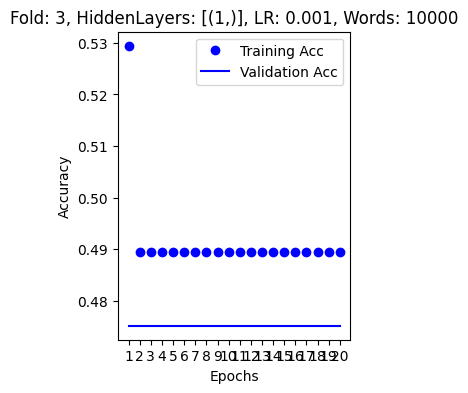

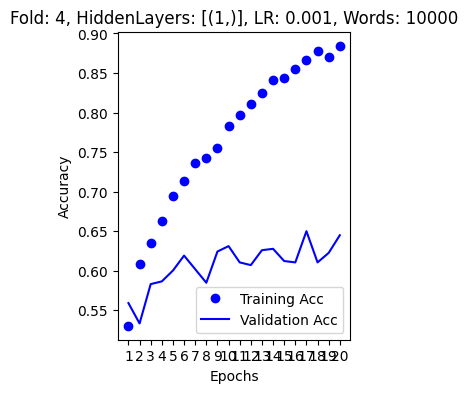

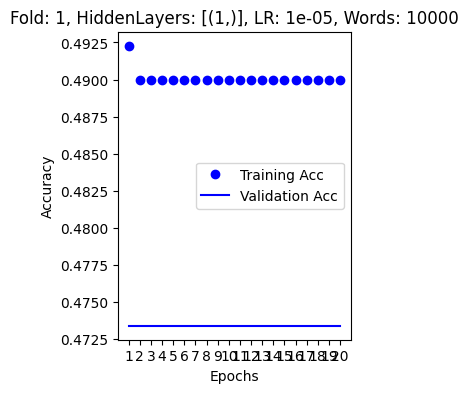

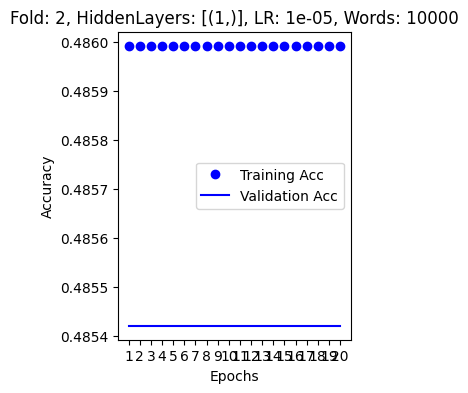

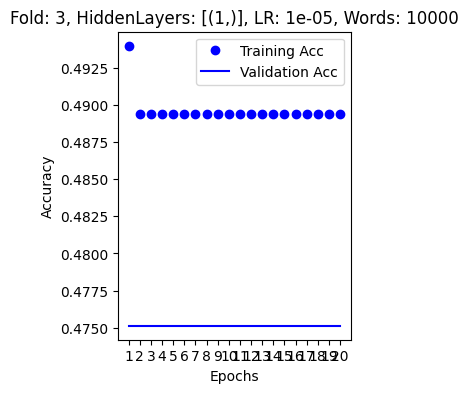

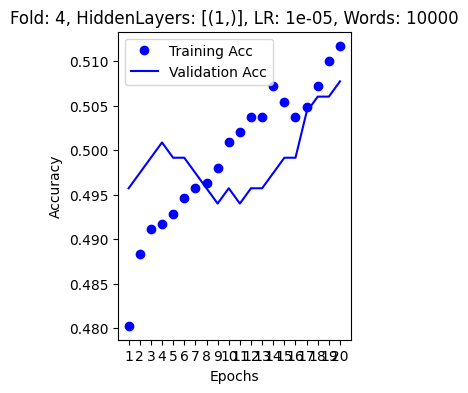

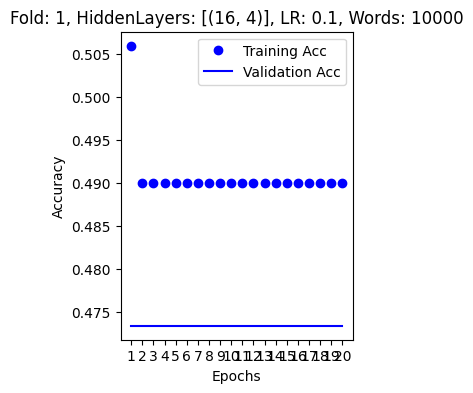

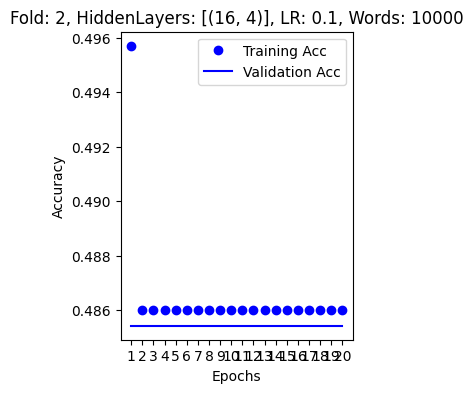

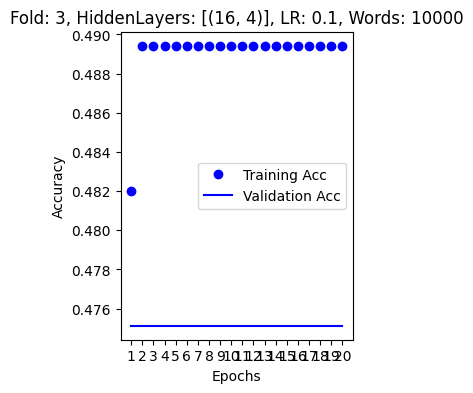

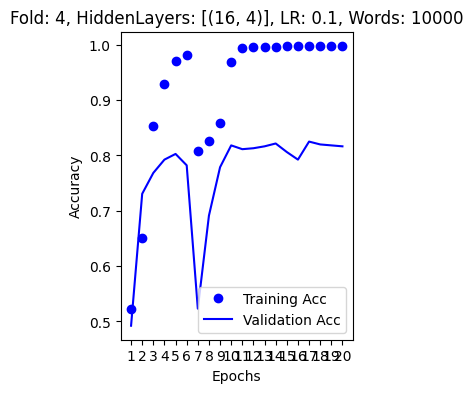

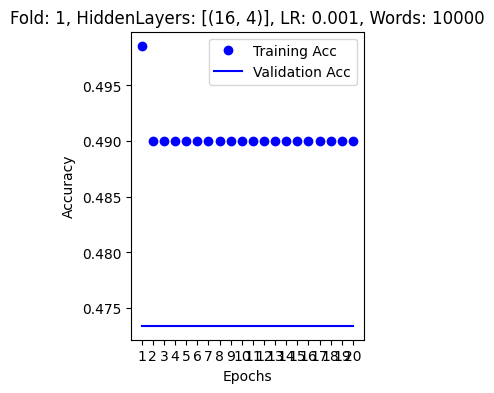

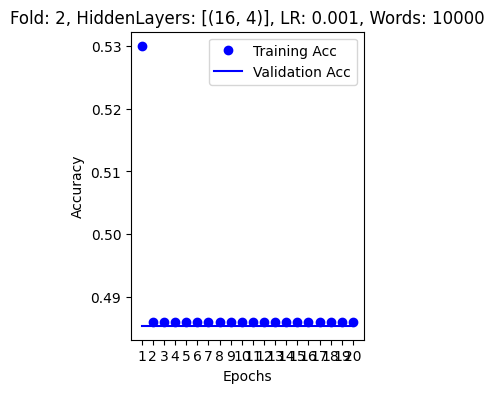

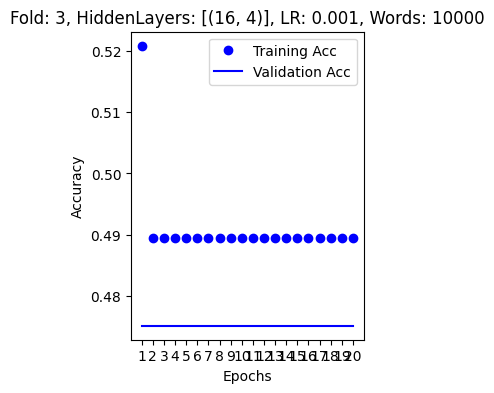

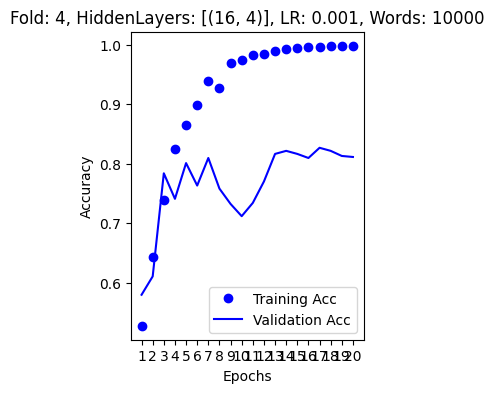

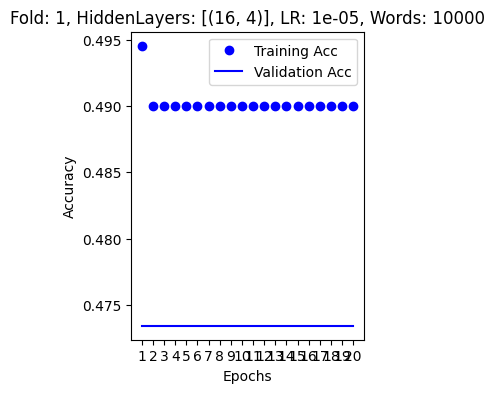

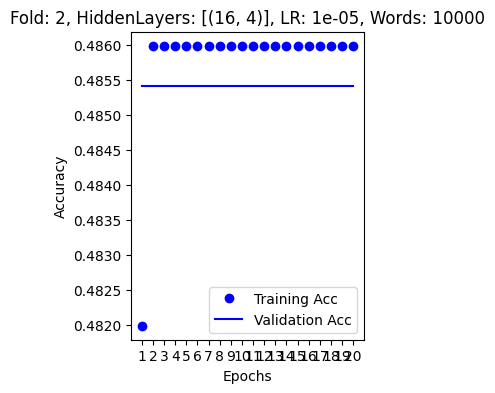

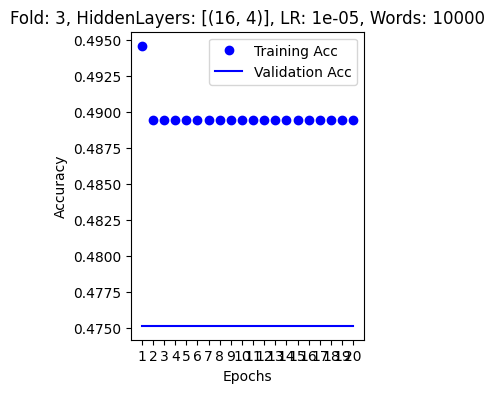

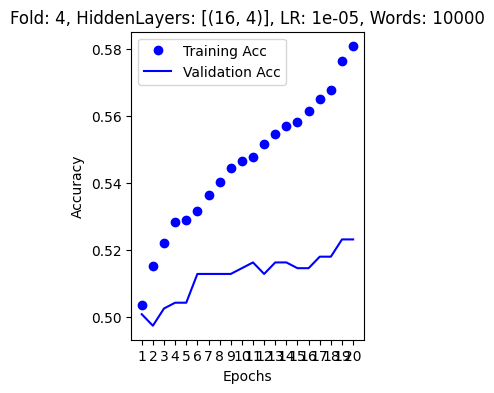

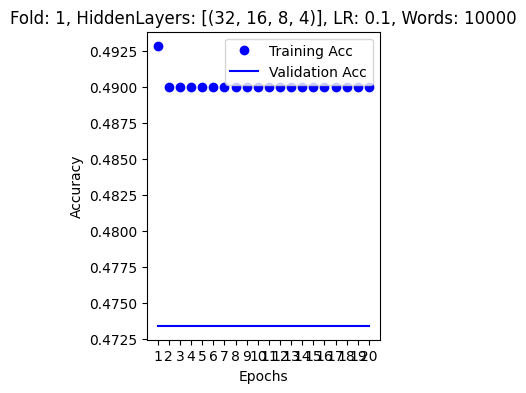

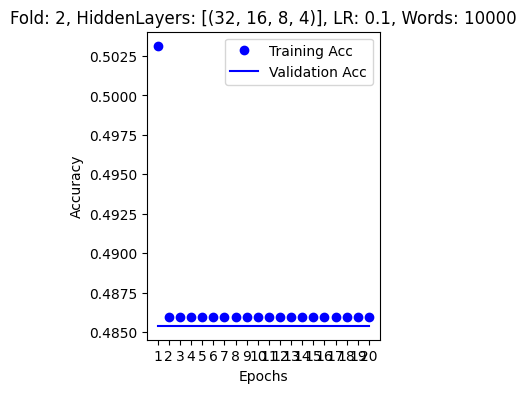

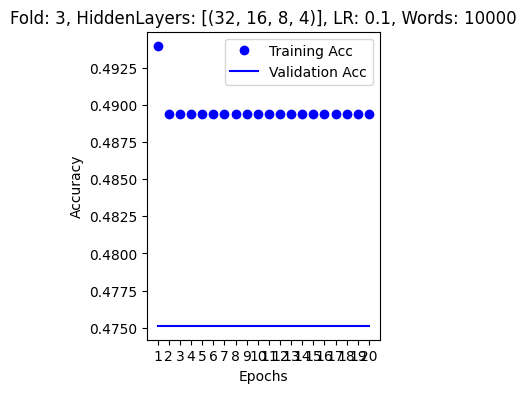

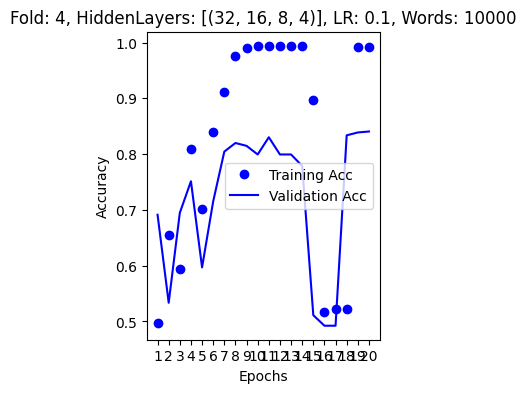

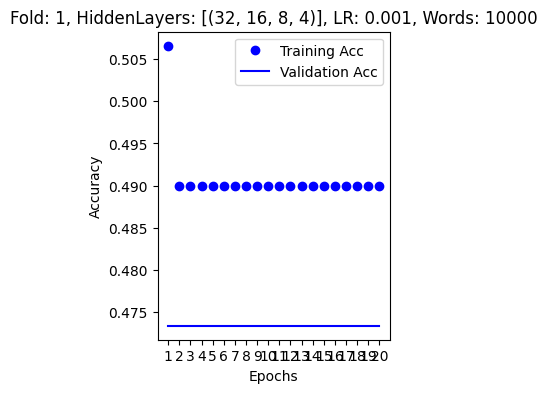

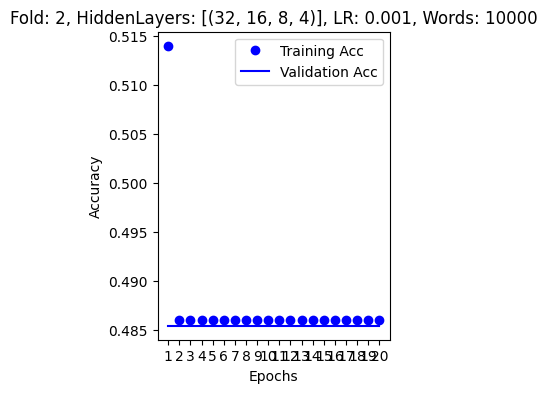

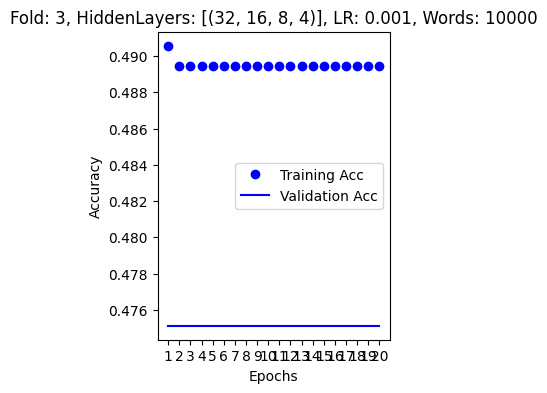

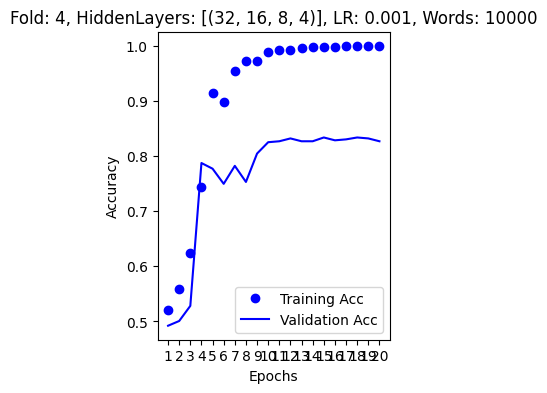

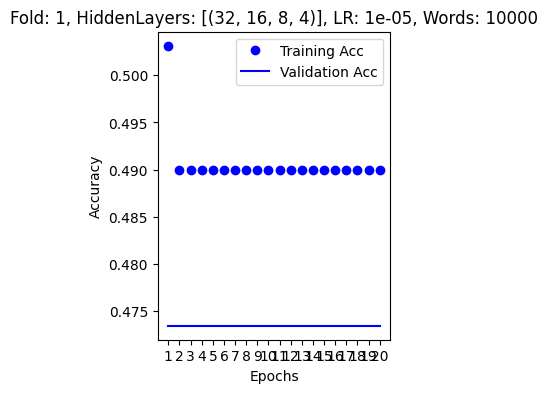

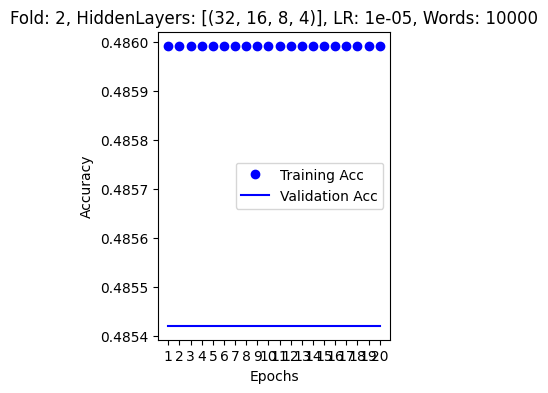

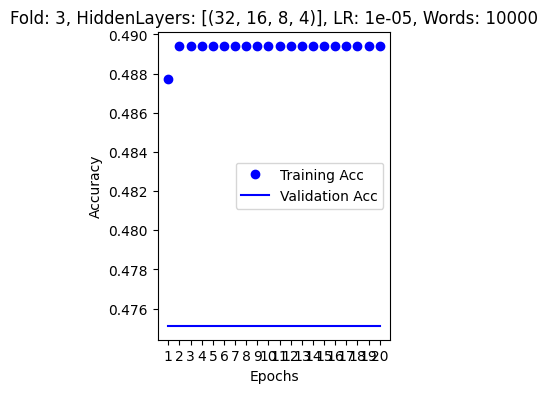

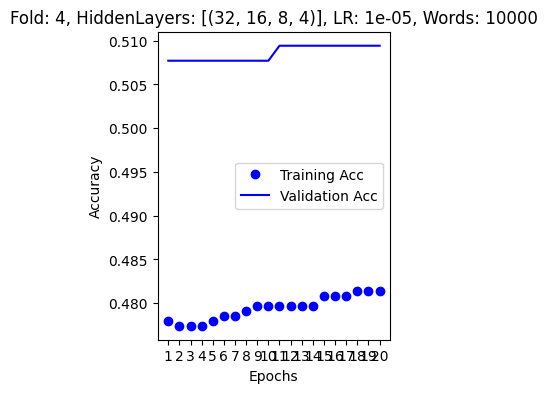

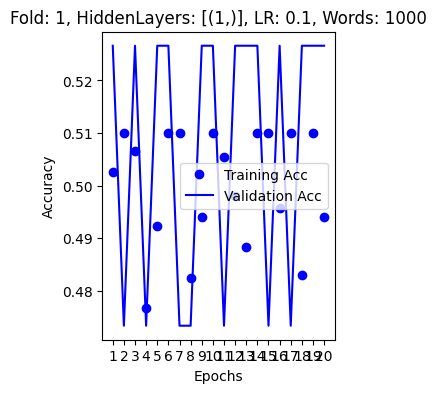

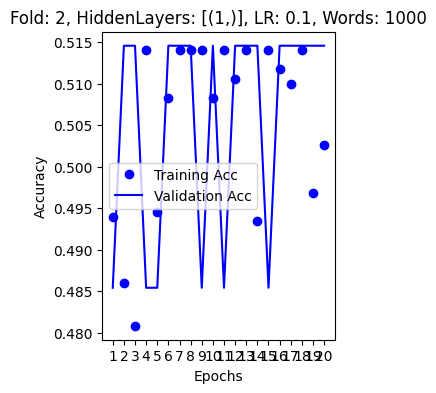

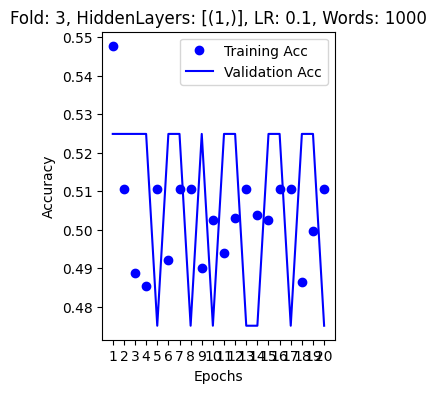

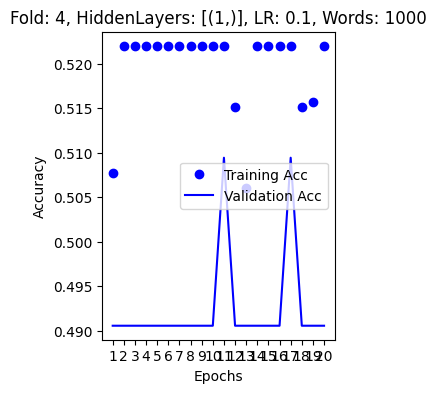

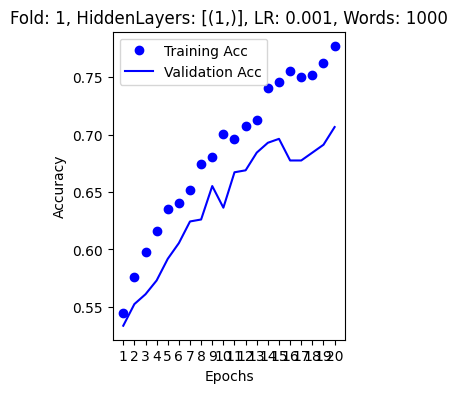

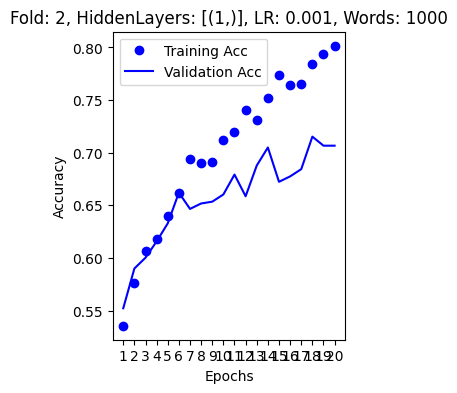

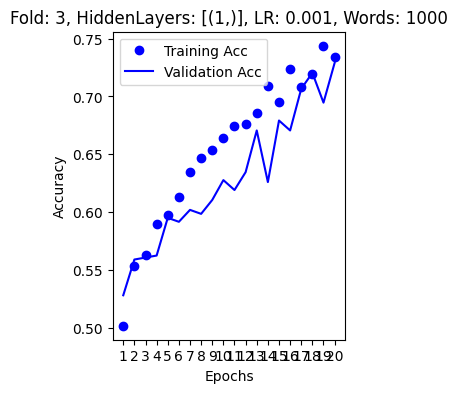

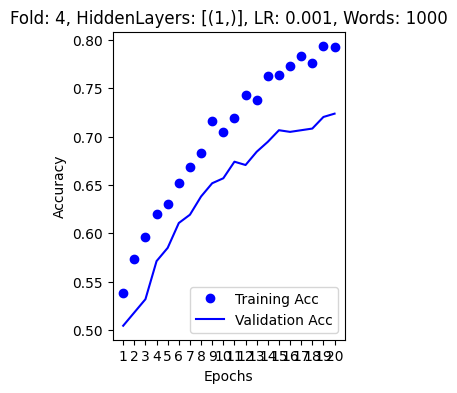

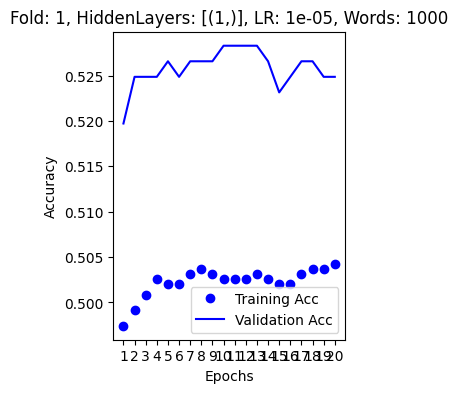

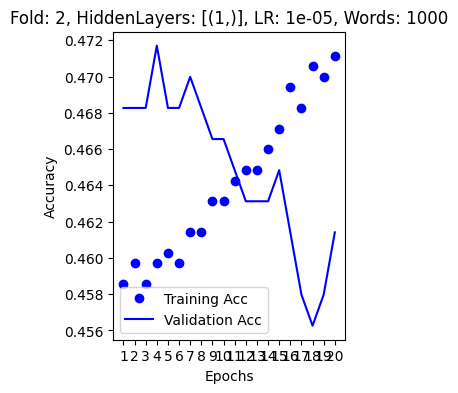

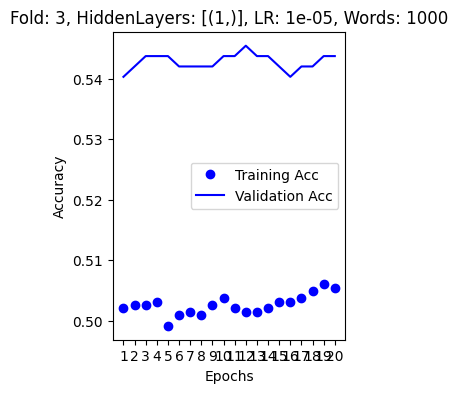

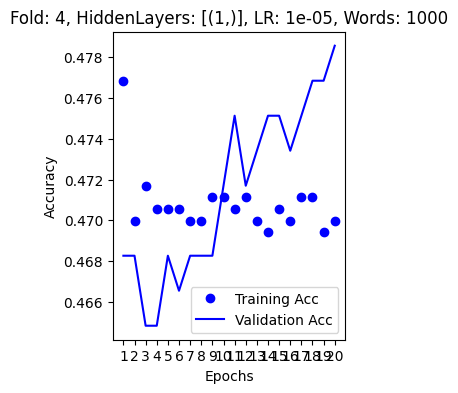

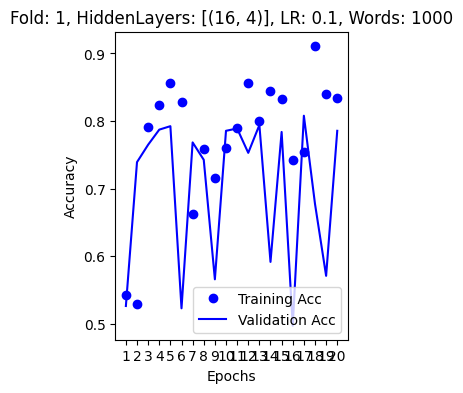

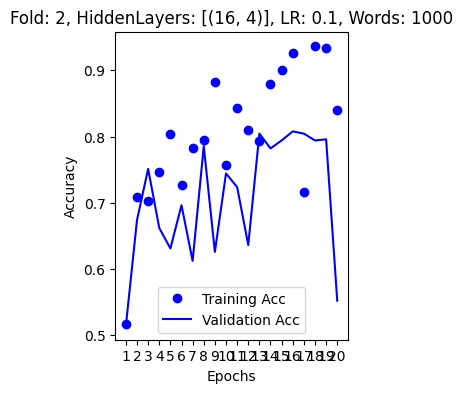

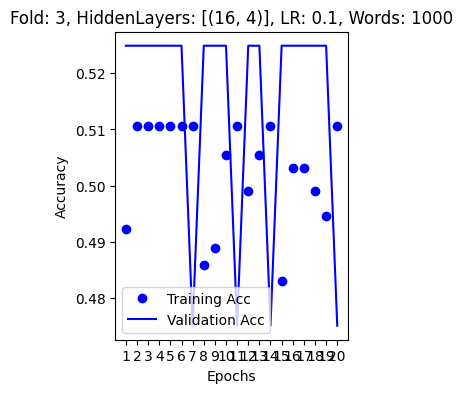

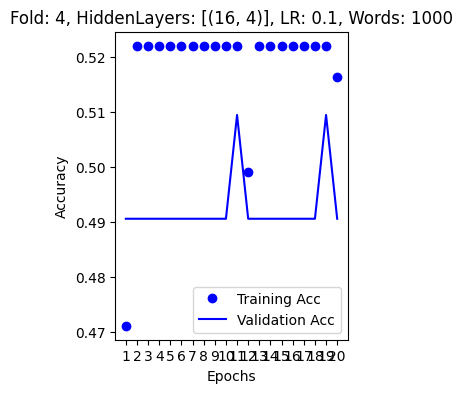

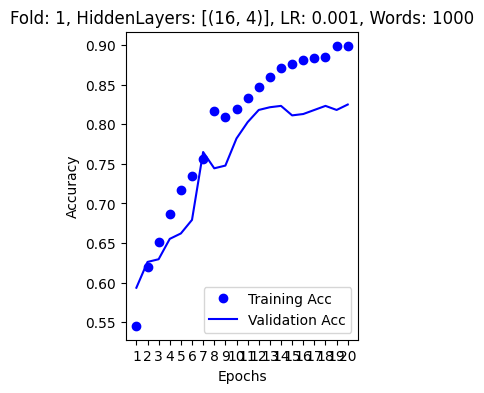

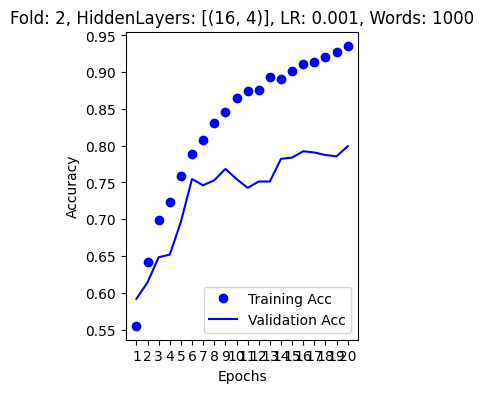

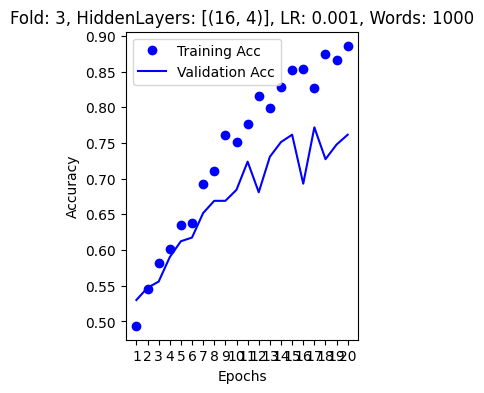

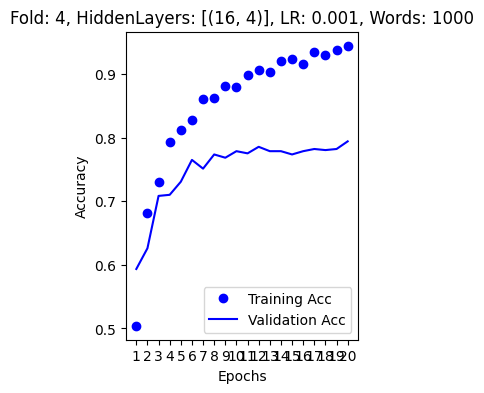

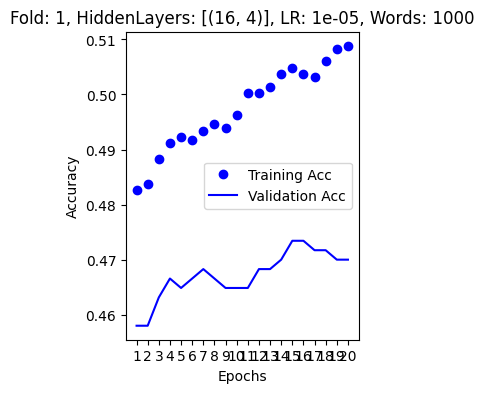

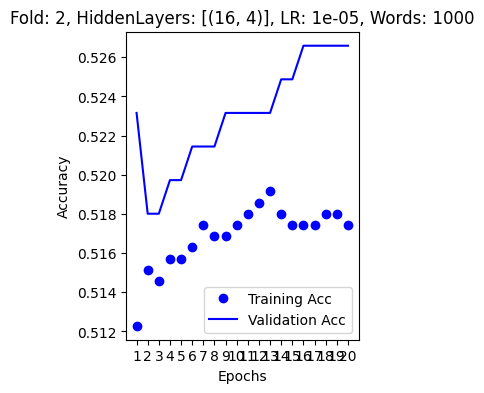

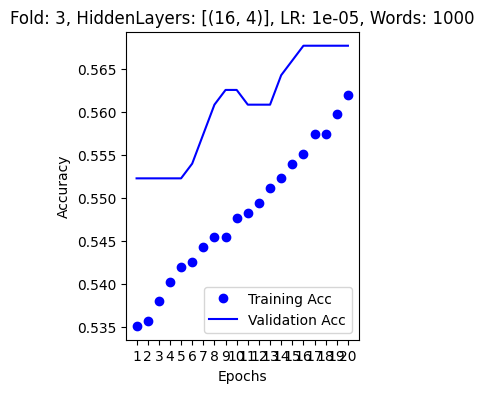

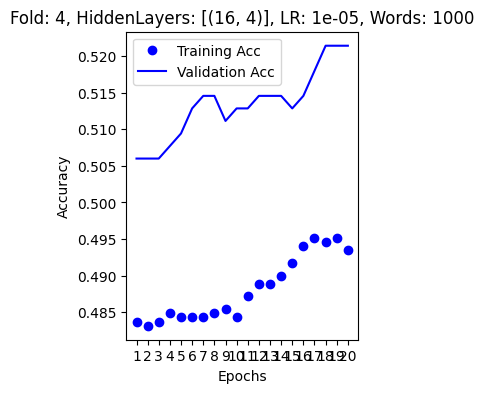

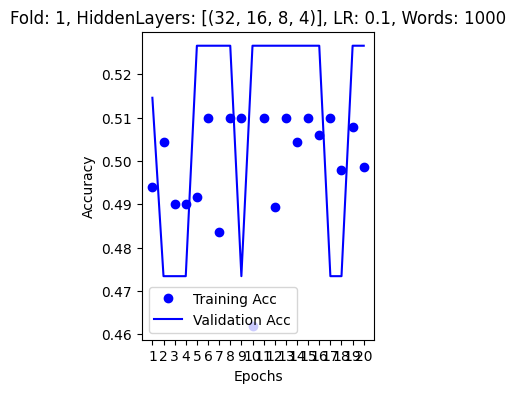

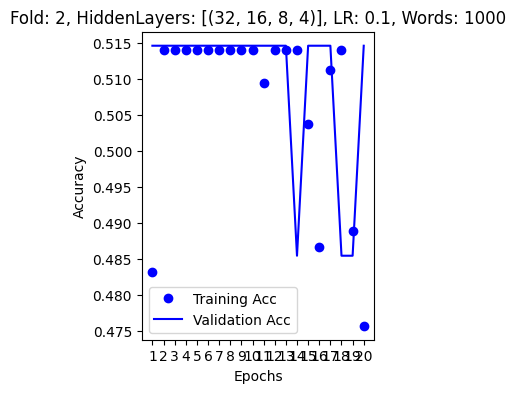

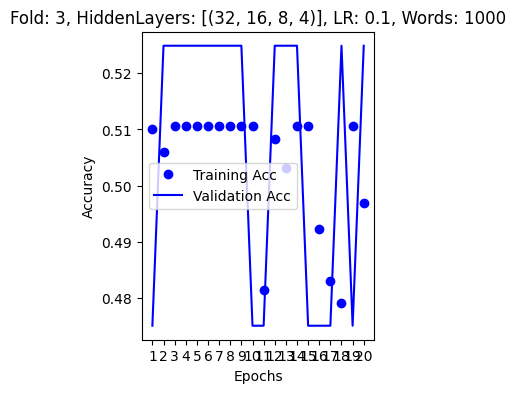

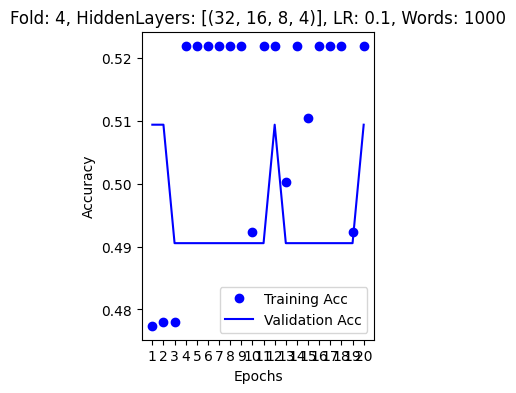

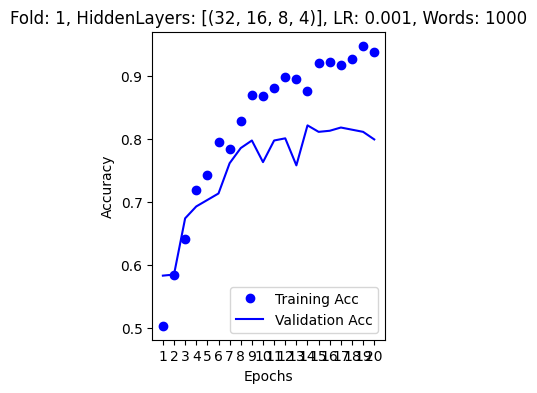

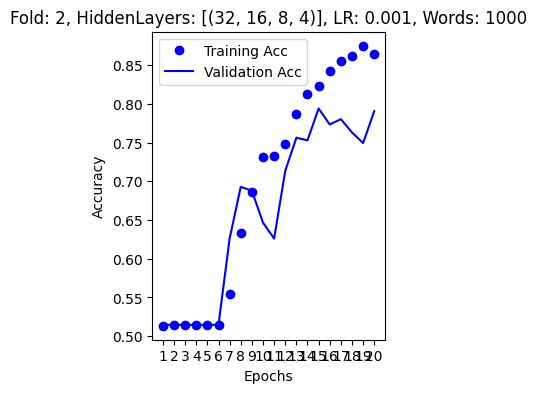

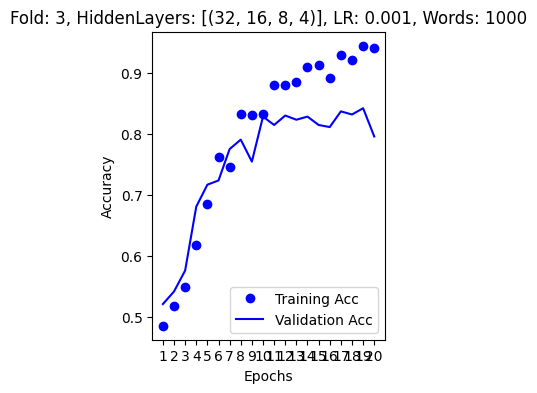

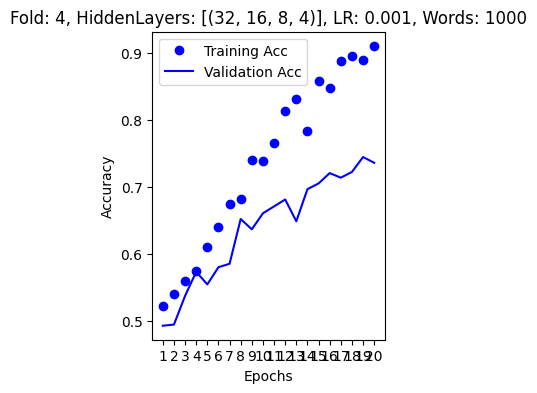

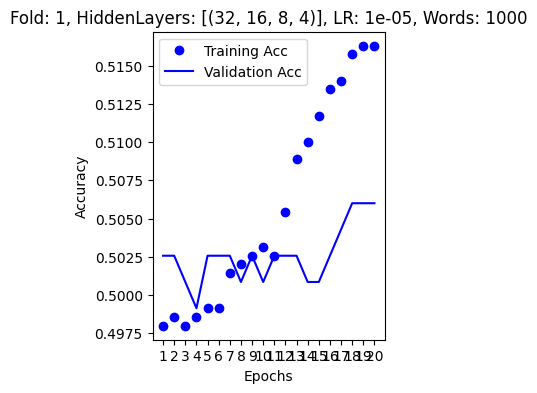

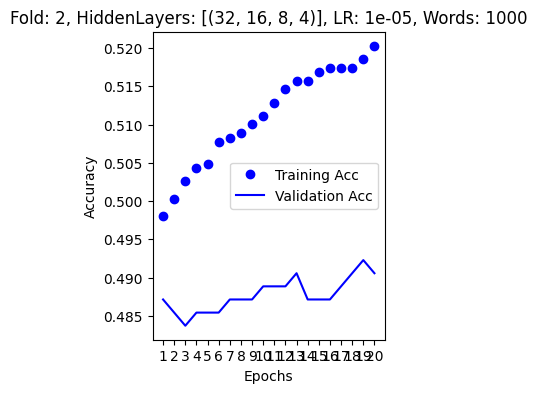

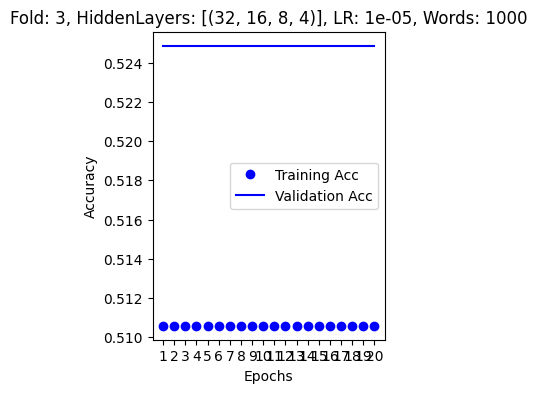

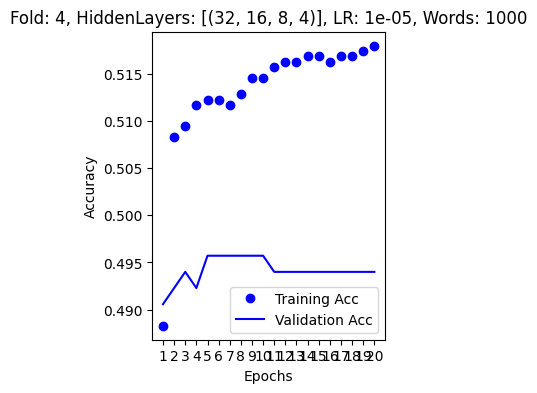

In [ ]:
# 4-fold cross-validation for each hyperparameter combination
results = []

fold_count = 0

validation_accuracy = np.zeros((72, 20))

for num_words in words_option:

  x_train_set = x_train[:, :num_words]

  x_test_set = x_test[:, :num_words]

  kf = KFold(n_splits=4, shuffle=True, random_state=42)

  for hidden_layer in hidden_layers:

    for lr in learning_rates:

        for i, (train_index, val_index) in enumerate(kf.split(x_train)):

          x_training_set, x_valid_set = x_train_set[train_index], x_train_set[val_index]
          y_training_set, y_valid_set = y_train[train_index], y_train[val_index]

          model = models.Sequential()

          model.add(layers.Input(shape=(num_words,)))

          for num_nodes in hidden_layer[0]:
            model.add(layers.Dense(num_nodes, activation='relu'))

          model.add(layers.Dense(1, activation='sigmoid'))

          model.compile(optimizer=optimizers.RMSprop(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

          history = model.fit(

              x_training_set, y_training_set,
              epochs=epochs, batch_size=batch_size,

              validation_data=(x_valid_set, y_valid_set), verbose=0)

          train_acc = np.array(history.history['accuracy'])

          val_acc = np.array(history.history['val_accuracy'])

          train_loss = np.array(history.history['loss'])

          val_loss = np.array(history.history['val_loss'])

          if fold_count < 72:

            validation_accuracy[fold_count] =  val_acc
            fold_count += 1

          # plot training and valid ac for each of the foldsss
          plt.figure(figsize=(3,4))

          plt.plot( range(1, len( train_acc )  +  1 ), train_acc, 'bo', label='TrainingAcc')

          plt.plot( range(1, len( val_acc ) + 1), val_acc, 'b-', label='ValidationAcc')

          plt.title(f' fold: { i + 1 }, Hiddenlayers: {hidden_layer}, LR: {lr}, words: {num_words}')
          plt.xticks( range(1,21,1))
          plt.xlabel( 'Epochs' )

          plt.ylabel('Accuracy ')
          plt.legend()

          plt.show()


        # calculating plot avg valid acc for all 4 folds
        avg_val_acc = np.mean(val_acc, axis=0)

        results.append((num_words, hidden_layer, lr, avg_val_acc))


In [ ]:
# analyze the results and select top 3 choice

top_choices = sorted(results, key=lambda x:x[3], reverse=True)[:3]

print("3 top choices")

for i, option in enumerate(top_choices):

  print(f"Rank {i+1}: number of words={option[0]}, Hiddens={option[1]}, Learnings = {option[2]}, Validation accuracy={option[3]}")

3 top choices
Rank 1: number of words=10000, Hidden layers=[(16, 4)], Learning rate = 0.001, Validation accuracy=0.7666380792856217
Rank 2: number of words=10000, Hidden layers=[(16, 4)], Learning rate = 0.1, Validation accuracy=0.7660377383232116
Rank 3: number of words=10000, Hidden layers=[(32, 16, 8, 4)], Learning rate = 0.001, Validation accuracy=0.7648370534181594


In [ ]:
# Evaluate the three top choices

y_train_bin = np.argmax(y_train, axis=1)

y_test_bin = np.argmax(y_test, axis=1)



for i, model_type in enumerate(top_choices):

  word, hidden_layer, lr, _ = model_type

  model = models.Sequential()

  model.add(layers.Input(shape=(word,)))


  for node in hidden_layer[0]:

    model.add(layers.Dense(node, activation='relu'))

  model.add(layers.Dense(1, activation='sigmoid'))


  model.compile(optimizer=optimizers.RMSprop(learning_rate=lr),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  model.fit(x_train[:, :word],
            y_train_bin,

            batch_size=512,
            verbose=0)
  test_loss, test_accuracy = model.evaluate(x_test[:, :word],
                                            y_test_bin)


  prediction = model.predict(x_test[:, :word])

  print(f'Model ranking {i+1}: test accuracy = {test_accuracy:.4f}, test loss = {test_loss:.4f}')

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 2332
'y' sizes: 25000
